In [1]:
pollTrain = read.csv("train2016.csv",na.strings=c("","NA"))

In [2]:
str(pollTrain)

'data.frame':	5568 obs. of  108 variables:
 $ USER_ID        : int  1 4 5 8 9 10 11 12 13 15 ...
 $ YOB            : int  1938 1970 1997 1983 1984 1997 1983 1996 NA 1981 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 1 2 2 1 1 2 2 2 1 ...
 $ Income         : Factor w/ 6 levels "$100,001 - $150,000",..: NA 5 4 1 3 5 2 4 NA 3 ...
 $ HouseholdStatus: Factor w/ 6 levels "Domestic Partners (no kids)",..: 4 2 5 4 4 5 3 5 5 4 ...
 $ EducationLevel : Factor w/ 7 levels "Associate's Degree",..: NA 2 6 2 6 3 4 3 3 NA ...
 $ Party          : Factor w/ 2 levels "Democrat","Republican": 1 1 2 1 2 1 1 2 2 2 ...
 $ Q124742        : Factor w/ 2 levels "No","Yes": 1 NA NA 1 1 NA NA 2 1 1 ...
 $ Q124122        : Factor w/ 2 levels "No","Yes": NA 2 2 2 2 NA NA 2 NA 1 ...
 $ Q123464        : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 NA NA 1 2 1 ...
 $ Q123621        : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 NA NA 1 1 1 ...
 $ Q122769        : Factor w/ 2 levels "No","Yes": 1 1 NA 1 1 1 NA 1

In [3]:
pollTest = read.csv("test2016.csv",na.strings=c("","NA"))#, na.strings=c("","NA"))

In [75]:
summary(pollTrain$Party)

Democrat Republican 
      2951       2617

In [76]:
names(pollTrain)

[1] "USER_ID"         "YOB"             "Gender"          "Income"         
  [5] "HouseholdStatus" "EducationLevel"  "Party"           "Q124742"        
  [9] "Q124122"         "Q123464"         "Q123621"         "Q122769"        
 [13] "Q122770"         "Q122771"         "Q122120"         "Q121699"        
 [17] "Q121700"         "Q120978"         "Q121011"         "Q120379"        
 [21] "Q120650"         "Q120472"         "Q120194"         "Q120012"        
 [25] "Q120014"         "Q119334"         "Q119851"         "Q119650"        
 [29] "Q118892"         "Q118117"         "Q118232"         "Q118233"        
 [33] "Q118237"         "Q117186"         "Q117193"         "Q116797"        
 [37] "Q116881"         "Q116953"         "Q116601"         "Q116441"        
 [41] "Q116448"         "Q116197"         "Q115602"         "Q115777"        
 [45] "Q115610"         "Q115611"         "Q115899"         "Q115390"        
 [49] "Q114961"         "Q114748"         "Q115195"         "Q114517"        
 [53] "Q114386"         "Q113992"         "Q114152"         "Q113583"        
 [57] "Q113584"         "Q113181"         "Q112478"         "Q112512"        
 [61] "Q112270"         "Q111848"         "Q111580"         "Q111220"        
 [65] "Q110740"         "Q109367"         "Q108950"         "Q109244"        
 [69] "Q108855"         "Q108617"         "Q108856"         "Q108754"        
 [73] "Q108342"         "Q108343"         "Q107869"         "Q107491"        
 [77] "Q106993"         "Q106997"         "Q106272"         "Q106388"        
 [81] "Q106389"         "Q106042"         "Q105840"         "Q105655"        
 [85] "Q104996"         "Q103293"         "Q102906"         "Q102674"        
 [89] "Q102687"         "Q102289"         "Q102089"         "Q101162"        
 [93] "Q101163"         "Q101596"         "Q100689"         "Q100680"        
 [97] "Q100562"         "Q99982"          "Q100010"         "Q99716"         
[101] "Q99581"          "Q99480"          "Q98869"          "Q98578"         
[105] "Q98059"          "Q98078"          "Q98197"          "Q96024"

In [77]:
table(pollTrain$Party)


  Democrat Republican 
      2951       2617 

In [78]:
2951/(2951+2617)

[1] 0.5299928

In [4]:
library(mice)

Loading required package: Rcpp
Loading required package: lattice
mice 2.22 2014-06-10


In [80]:
# We will do only partial impute for now 
vars_for_impute = setdiff(names(pollTrain),c("USER_ID", "Party"))
vars_for_impute
imputed_train = complete(mice(pollTrain[vars_for_impute]))
pollTrain[vars_for_impute] = imputed_train
str(pollTrain)

[1] "YOB"             "Gender"          "Income"          "HouseholdStatus"
  [5] "EducationLevel"  "Q124742"         "Q124122"         "Q123464"        
  [9] "Q123621"         "Q122769"         "Q122770"         "Q122771"        
 [13] "Q122120"         "Q121699"         "Q121700"         "Q120978"        
 [17] "Q121011"         "Q120379"         "Q120650"         "Q120472"        
 [21] "Q120194"         "Q120012"         "Q120014"         "Q119334"        
 [25] "Q119851"         "Q119650"         "Q118892"         "Q118117"        
 [29] "Q118232"         "Q118233"         "Q118237"         "Q117186"        
 [33] "Q117193"         "Q116797"         "Q116881"         "Q116953"        
 [37] "Q116601"         "Q116441"         "Q116448"         "Q116197"        
 [41] "Q115602"         "Q115777"         "Q115610"         "Q115611"        
 [45] "Q115899"         "Q115390"         "Q114961"         "Q114748"        
 [49] "Q115195"         "Q114517"         "Q114386"         "Q113992"        
 [53] "Q114152"         "Q113583"         "Q113584"         "Q113181"        
 [57] "Q112478"         "Q112512"         "Q112270"         "Q111848"        
 [61] "Q111580"         "Q111220"         "Q110740"         "Q109367"        
 [65] "Q108950"         "Q109244"         "Q108855"         "Q108617"        
 [69] "Q108856"         "Q108754"         "Q108342"         "Q108343"        
 [73] "Q107869"         "Q107491"         "Q106993"         "Q106997"        
 [77] "Q106272"         "Q106388"         "Q106389"         "Q106042"        
 [81] "Q105840"         "Q105655"         "Q104996"         "Q103293"        
 [85] "Q102906"         "Q102674"         "Q102687"         "Q102289"        
 [89] "Q102089"         "Q101162"         "Q101163"         "Q101596"        
 [93] "Q100689"         "Q100680"         "Q100562"         "Q99982"         
 [97] "Q100010"         "Q99716"          "Q99581"          "Q99480"         
[101] "Q98869"          "Q98578"          "Q98059"          "Q98078"         
[105] "Q98197"          "Q96024"


 iter imp variable
  1   1  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q124742  Q124122  Q123464  Q123621  Q122769  Q122770  Q122771  Q122120  Q121699  Q121700  Q120978  Q121011  Q120379  Q120650  Q120472  Q120194  Q120012  Q120014  Q119334  Q119851  Q119650  Q118892  Q118117  Q118232  Q118233  Q118237  Q117186  Q117193  Q116797  Q116881  Q116953  Q116601  Q116441  Q116448  Q116197  Q115602  Q115777  Q115610  Q115611  Q115899  Q115390  Q114961  Q114748  Q115195  Q114517  Q114386  Q113992  Q114152  Q113583  Q113584  Q113181  Q112478  Q112512  Q112270  Q111848  Q111580  Q111220  Q110740  Q109367  Q108950  Q109244  Q108855  Q108617  Q108856  Q108754  Q108342  Q108343  Q107869  Q107491  Q106993  Q106997  Q106272  Q106388  Q106389  Q106042  Q105840  Q105655  Q104996  Q103293  Q102906  Q102674  Q102687  Q102289  Q102089  Q101162  Q101163  Q101596  Q100689  Q100680  Q100562  Q99982  Q100010  Q99716  Q99581  Q99480  Q98869  Q98578  Q98059  Q98078  Q98197  Q96024
  1   2  YOB  Gende

In [5]:
vars_for_impute = setdiff(names(pollTest),c("USER_ID", "Party"))
vars_for_impute

imputed_test = complete(mice(pollTest[vars_for_impute]))
pollTest[vars_for_impute] = imputed_test
str(pollTest)

[1] "YOB"             "Gender"          "Income"          "HouseholdStatus"
  [5] "EducationLevel"  "Q124742"         "Q124122"         "Q123464"        
  [9] "Q123621"         "Q122769"         "Q122770"         "Q122771"        
 [13] "Q122120"         "Q121699"         "Q121700"         "Q120978"        
 [17] "Q121011"         "Q120379"         "Q120650"         "Q120472"        
 [21] "Q120194"         "Q120012"         "Q120014"         "Q119334"        
 [25] "Q119851"         "Q119650"         "Q118892"         "Q118117"        
 [29] "Q118232"         "Q118233"         "Q118237"         "Q117186"        
 [33] "Q117193"         "Q116797"         "Q116881"         "Q116953"        
 [37] "Q116601"         "Q116441"         "Q116448"         "Q116197"        
 [41] "Q115602"         "Q115777"         "Q115610"         "Q115611"        
 [45] "Q115899"         "Q115390"         "Q114961"         "Q114748"        
 [49] "Q115195"         "Q114517"         "Q114386"         "Q113992"        
 [53] "Q114152"         "Q113583"         "Q113584"         "Q113181"        
 [57] "Q112478"         "Q112512"         "Q112270"         "Q111848"        
 [61] "Q111580"         "Q111220"         "Q110740"         "Q109367"        
 [65] "Q108950"         "Q109244"         "Q108855"         "Q108617"        
 [69] "Q108856"         "Q108754"         "Q108342"         "Q108343"        
 [73] "Q107869"         "Q107491"         "Q106993"         "Q106997"        
 [77] "Q106272"         "Q106388"         "Q106389"         "Q106042"        
 [81] "Q105840"         "Q105655"         "Q104996"         "Q103293"        
 [85] "Q102906"         "Q102674"         "Q102687"         "Q102289"        
 [89] "Q102089"         "Q101162"         "Q101163"         "Q101596"        
 [93] "Q100689"         "Q100680"         "Q100562"         "Q99982"         
 [97] "Q100010"         "Q99716"          "Q99581"          "Q99480"         
[101] "Q98869"          "Q98578"          "Q98059"          "Q98078"         
[105] "Q98197"          "Q96024"


 iter imp variable
  1   1  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q124742  Q124122  Q123464  Q123621  Q122769  Q122770  Q122771  Q122120  Q121699  Q121700  Q120978  Q121011  Q120379  Q120650  Q120472  Q120194  Q120012  Q120014  Q119334  Q119851  Q119650  Q118892  Q118117  Q118232  Q118233  Q118237  Q117186  Q117193  Q116797  Q116881  Q116953  Q116601  Q116441  Q116448  Q116197  Q115602  Q115777  Q115610  Q115611  Q115899  Q115390  Q114961  Q114748  Q115195  Q114517  Q114386  Q113992  Q114152  Q113583  Q113584  Q113181  Q112478  Q112512  Q112270  Q111848  Q111580  Q111220  Q110740  Q109367  Q108950  Q109244  Q108855  Q108617  Q108856  Q108754  Q108342  Q108343  Q107869  Q107491  Q106993  Q106997  Q106272  Q106388  Q106389  Q106042  Q105840  Q105655  Q104996  Q103293  Q102906  Q102674  Q102687  Q102289  Q102089  Q101162  Q101163  Q101596  Q100689  Q100680  Q100562  Q99982  Q100010  Q99716  Q99581  Q99480  Q98869  Q98578  Q98059  Q98078  Q98197  Q96024
  1   2  YOB  Gende

In [103]:
library(caTools)
pollTrainImp = read.csv("pollTrain_imputed.csv")

In [104]:
split = sample.split(pollTrainImp$Party, SplitRatio = 0.7)
split[1:10]

nrow(pollTrain)
Train = pollTrainImp[split,setdiff(names(pollTrainImp), "USER_ID")]
nrow(Train)
Test = pollTrainImp[!split,setdiff(names(pollTrainImp), "USER_ID")]
nrow(Test)

[1]  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE

[1] 5568

[1] 3898

[1] 1670

In [105]:
setdiff(c("12","as","de"), "de")

[1] "12" "as"

In [106]:
setdiff(names(pollTrain), "USER_ID")

[1] "YOB"             "Gender"          "Income"          "HouseholdStatus"
  [5] "EducationLevel"  "Party"           "Q124742"         "Q124122"        
  [9] "Q123464"         "Q123621"         "Q122769"         "Q122770"        
 [13] "Q122771"         "Q122120"         "Q121699"         "Q121700"        
 [17] "Q120978"         "Q121011"         "Q120379"         "Q120650"        
 [21] "Q120472"         "Q120194"         "Q120012"         "Q120014"        
 [25] "Q119334"         "Q119851"         "Q119650"         "Q118892"        
 [29] "Q118117"         "Q118232"         "Q118233"         "Q118237"        
 [33] "Q117186"         "Q117193"         "Q116797"         "Q116881"        
 [37] "Q116953"         "Q116601"         "Q116441"         "Q116448"        
 [41] "Q116197"         "Q115602"         "Q115777"         "Q115610"        
 [45] "Q115611"         "Q115899"         "Q115390"         "Q114961"        
 [49] "Q114748"         "Q115195"         "Q114517"         "Q114386"        
 [53] "Q113992"         "Q114152"         "Q113583"         "Q113584"        
 [57] "Q113181"         "Q112478"         "Q112512"         "Q112270"        
 [61] "Q111848"         "Q111580"         "Q111220"         "Q110740"        
 [65] "Q109367"         "Q108950"         "Q109244"         "Q108855"        
 [69] "Q108617"         "Q108856"         "Q108754"         "Q108342"        
 [73] "Q108343"         "Q107869"         "Q107491"         "Q106993"        
 [77] "Q106997"         "Q106272"         "Q106388"         "Q106389"        
 [81] "Q106042"         "Q105840"         "Q105655"         "Q104996"        
 [85] "Q103293"         "Q102906"         "Q102674"         "Q102687"        
 [89] "Q102289"         "Q102089"         "Q101162"         "Q101163"        
 [93] "Q101596"         "Q100689"         "Q100680"         "Q100562"        
 [97] "Q99982"          "Q100010"         "Q99716"          "Q99581"         
[101] "Q99480"          "Q98869"          "Q98578"          "Q98059"         
[105] "Q98078"          "Q98197"          "Q96024"

In [107]:
summary(Train$Party)

Democrat Republican 
      2066       1832

In [108]:
Train$Party = as.numeric(Train$Party=="Democrat")
Test$Party = as.numeric(Test$Party=="Democrat")

In [109]:
table(Train$Party)
table(Test$Party)


   0    1 
1832 2066 


  0   1 
785 885 

In [110]:
LogModel1 = glm(Party~., data = Train, family = binomial)

In [111]:
sum(Train$Gender=="")
nrow(Train)

[1] 0

[1] 3898

In [112]:
summary(LogModel1)


Call:
glm(formula = Party ~ ., family = binomial, data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2667  -1.0826   0.6084   1.0623   1.8624  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                                6.5173433  8.4500408   0.771
YOB                                       -0.0035685  0.0042620  -0.837
GenderMale                                 0.0004735  0.1001181   0.005
Income$25,001 - $50,000                   -0.0305424  0.1379843  -0.221
Income$50,000 - $74,999                   -0.0720912  0.1240179  -0.581
Income$75,000 - $100,000                   0.0208747  0.1231856   0.169
Incomeover $150,000                       -0.2879544  0.1253728  -2.297
Incomeunder $25,000                       -0.1266302  0.1397918  -0.906
HouseholdStatusDomestic Partners (w/kids) -0.2484490  0.3725090  -0.667
HouseholdStatusMarried (no kids)          -0.5137972  0.2322728  -2.212
HouseholdStatu

In [113]:
PrdTrain = predict(LogModel1,newdata = Train, type = "response")

In [114]:
summary(PrdTrain>0.5)

   Mode   FALSE    TRUE    NA's 
logical    1773    2125       0 

In [115]:
t = table(Train$Party,PrdTrain>0.5)
t

   
    FALSE TRUE
  0  1090  742
  1   683 1383

In [116]:
sum(diag(t))/sum(t)

[1] 0.6344279

In [117]:
table(Train$Party)


   0    1 
1832 2066 

In [118]:
2038/(2038+1828)

[1] 0.5271599

In [119]:
PrdTest = predict(LogModel1,newdata = Test, type = "response")

In [120]:
t = table(Test$Party,PrdTest>0.5)
t

   
    FALSE TRUE
  0   461  324
  1   312  573

In [121]:
sum(diag(t))/sum(t)

[1] 0.6191617

In [122]:
library(ROCR)

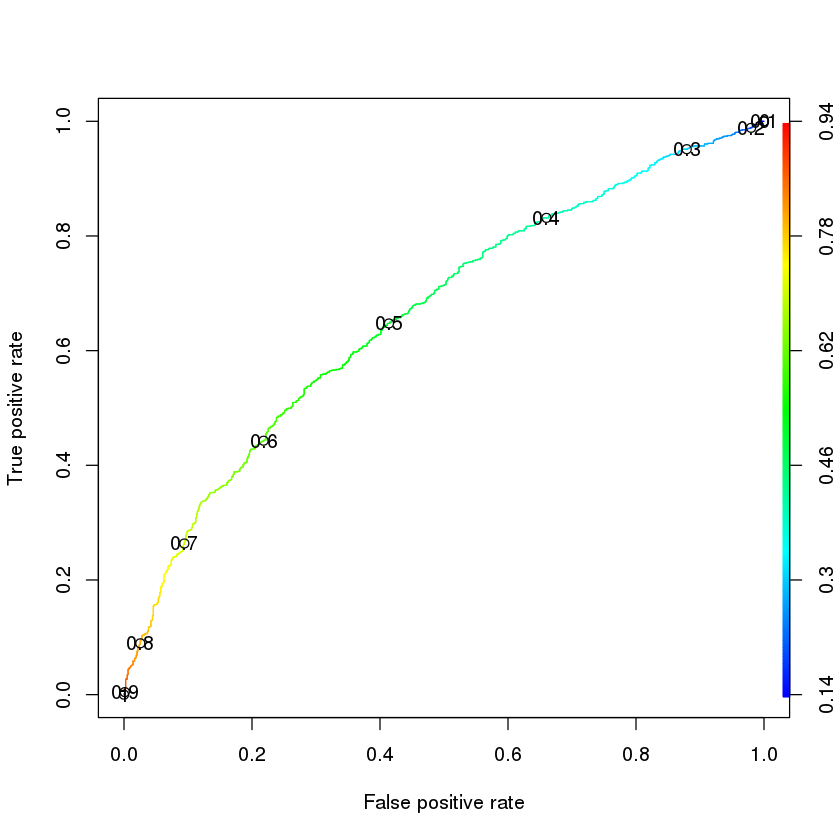

In [123]:

ROCRPred = prediction(PrdTest,Test$Party)
ROCRPerf = performance(ROCRPred,"tpr","fpr")
plot(ROCRPerf,colorize = TRUE, print.cutoffs.at = seq(0,1,0.1))

In [31]:
prdFinTest = predict(LogModel1,newdata = pollTest, type = "response")

In [32]:
str(pollTest)

'data.frame':	1392 obs. of  107 variables:
 $ USER_ID        : int  2 3 6 7 14 28 29 37 44 56 ...
 $ YOB            : int  1985 1983 1995 1980 1980 1973 1968 1961 1989 1975 ...
 $ Gender         : Factor w/ 3 levels "","Female","Male": 2 3 3 2 2 3 2 3 2 3 ...
 $ Income         : Factor w/ 7 levels "","$100,001 - $150,000",..: 3 4 5 4 1 6 4 6 7 5 ...
 $ HouseholdStatus: Factor w/ 7 levels "","Domestic Partners (no kids)",..: 6 5 6 6 4 4 6 2 6 5 ...
 $ EducationLevel : Factor w/ 8 levels "","Associate's Degree",..: 8 5 4 8 5 8 3 7 7 3 ...
 $ Q124742        : Factor w/ 3 levels "","No","Yes": 1 1 1 3 1 2 1 1 1 2 ...
 $ Q124122        : Factor w/ 3 levels "","No","Yes": 3 1 1 3 3 3 1 3 3 1 ...
 $ Q123464        : Factor w/ 3 levels "","No","Yes": 2 2 1 2 2 2 1 2 2 2 ...
 $ Q123621        : Factor w/ 3 levels "","No","Yes": 3 1 1 3 3 3 1 3 3 3 ...
 $ Q122769        : Factor w/ 3 levels "","No","Yes": 2 3 1 3 2 2 1 1 2 3 ...
 $ Q122770        : Factor w/ 3 levels "","No","Yes": 2 3 1 3 2 2 1

In [33]:
prdFinTest2 = prdFinTest

In [34]:
summary(prdFinTest>0.5)

   Mode   FALSE    TRUE    NA's 
logical     584     726      82 

In [35]:
prdFinTest2[is.na(prdFinTest2)] = 1

In [36]:
dim(as.vector(prdFinTest2))

NULL

In [37]:
sum(is.na(prdFinTest2))

[1] 0

In [38]:
length(prdFinTest2)

[1] 1392

In [39]:
t = table(prdFinTest2>0.5)
t


FALSE  TRUE 
  584   808 

In [40]:
prdFinTest2 = prdFinTest2>0.5

In [41]:
prdFinTest2[1:10]

1     2     3     4     5     6     7     8     9    10 
 TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [42]:
df = data.frame(pollTest$USER_ID,as.numericprdFinTest2>0.5)

ERROR: Error in data.frame(pollTest$USER_ID, as.numericprdFinTest2 > 0.5): object 'as.numericprdFinTest2' not found


In [43]:
Predictions = prdFinTest2

In [44]:
Predictions[prdFinTest2] = "Democrat"

In [45]:
Predictions[!prdFinTest2] = "Republican"

In [46]:
table(Predictions)

Predictions
  Democrat Republican 
       808        584 

In [47]:
df = data.frame(pollTest$USER_ID,Predictions)

In [48]:
str(df)

'data.frame':	1392 obs. of  2 variables:
 $ pollTest.USER_ID: int  2 3 6 7 14 28 29 37 44 56 ...
 $ Predictions     : Factor w/ 2 levels "Democrat","Republican": 1 1 2 1 1 1 1 1 1 1 ...


In [49]:
names(df) = c("USER_ID","Predictions")

In [50]:
str(df)

'data.frame':	1392 obs. of  2 variables:
 $ USER_ID    : int  2 3 6 7 14 28 29 37 44 56 ...
 $ Predictions: Factor w/ 2 levels "Democrat","Republican": 1 1 2 1 1 1 1 1 1 1 ...


In [51]:
summary(df)

    USER_ID         Predictions 
 Min.   :   2   Democrat  :808  
 1st Qu.:1774   Republican:584  
 Median :3540                   
 Mean   :3524                   
 3rd Qu.:5264                   
 Max.   :6947                   

In [52]:
table(pollTrain$Party)


  Democrat Republican 
      2951       2617 

In [53]:
write.csv(df,"submit1.csv",row.names=FALSE)

In [81]:
write.csv(pollTrain,"pollTrain_imputed.csv",row.names=FALSE)

In [6]:
write.csv(pollTest,"pollTest_imputed.csv",row.names=FALSE)